In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50)
coffeeDataSet = pd.read_csv('data\Coffee_Chain_Sales .csv')

In [3]:
dataSet = coffeeDataSet.copy()

In [4]:
dataSet

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,Product_type,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,Herbal Tea,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,Herbal Tea,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,Herbal Tea,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,Tea,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,Tea,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,Tea,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,Tea,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,Tea,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,Tea,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [5]:
dataSet.describe()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,587.030132,82.399247,0.387006,815.175141,102.423729,30.433145,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158
std,225.299162,64.824295,44.331180,916.156386,91.286704,25.963448,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526
min,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
25%,425.000000,41.000000,-15.000000,447.000000,51.000000,13.000000,16.250000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000
75%,774.000000,101.000000,13.000000,968.000000,130.000000,40.750000,87.000000,227.000000,90.000000,120.000000,80.000000,210.000000,66.000000
max,985.000000,294.000000,249.000000,8252.000000,526.000000,122.000000,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000


# Myynnin analisointi

## Myynti osavaltiota kohden

In [6]:
stateSaleSet = dataSet.copy()
stateSaleSet = stateSaleSet.groupby(['State'])['Sales'].sum().reset_index()
stateSaleSet['%'] = stateSaleSet.groupby(['State'])['Sales'].transform('sum') / stateSaleSet['Sales'].sum() * 100
stateSaleSet

,State,Sales,%
0,California,23032,11.351684
1,Colorado,12112,5.969590
2,Connecticut,6670,3.287415
3,Florida,8825,4.349540
4,Illinois,16812,8.286059
5,Iowa,13359,6.584194
6,Louisiana,6193,3.052318
7,Massachusetts,7339,3.617142
8,Missouri,6072,2.992681
9,Nevada,14822,7.305256


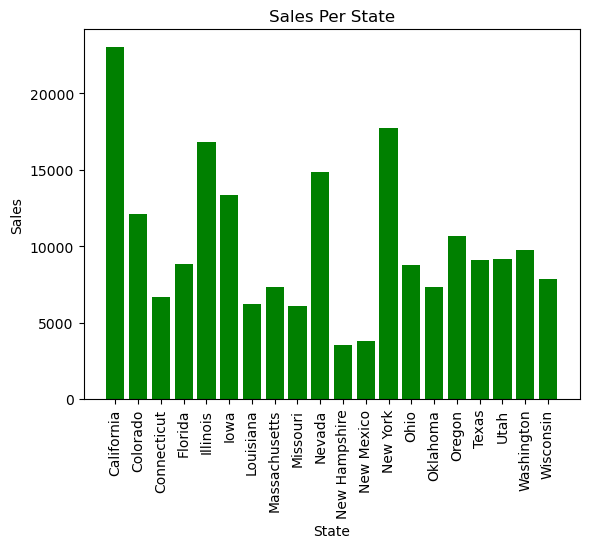

In [7]:
plt.bar(stateSaleSet['State'], stateSaleSet['Sales'], color='g')
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('Sales Per State')
plt.xticks(rotation='vertical')
plt.show()

## Voitto osavaltiota kohden

In [8]:
stateProfit = dataSet.copy()
stateProfit = stateProfit.groupby(['State'])['Profit'].sum().reset_index()

In [49]:
stateProfit['%'] = stateProfit.groupby(['State'])['Profit'].transform('sum') / stateProfit['Profit'].sum() * 100
stateProfit

,State,Profit,%
0,California,7340,11.413289
1,Colorado,4450,6.919501
2,Connecticut,2066,3.212514
3,Florida,2794,4.344513
4,Illinois,7380,11.475486
5,Iowa,5412,8.415357
6,Louisiana,2026,3.150316
7,Massachusetts,3710,5.768842
8,Missouri,956,1.486526
9,Nevada,2556,3.974437


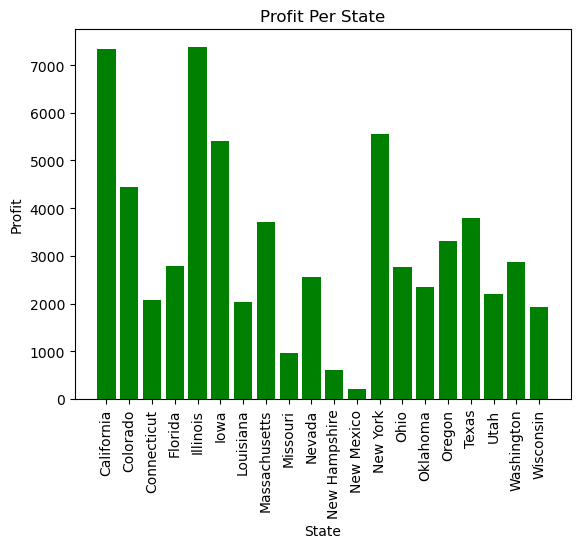

In [10]:
plt.bar(stateProfit['State'], stateProfit['Profit'], color='g')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profit Per State')
plt.xticks(rotation='vertical')
plt.show()

## Voitto kuukausittain ja quartaalittain

In [91]:
mounthlyProfit = dataSet.copy()
mounthlyProfit = mounthlyProfit.groupby(pd.PeriodIndex(mounthlyProfit['Date'], freq='M'))['Profit'].sum().reset_index()
mounthlyProfit['Month'] = mounthlyProfit['Date'].dt.strftime('%B')
mounthlyProfit['Year'] = mounthlyProfit['Date'].dt.year
mounthlyProfit

,Date,Profit,Month,Year
0,2012-10,873,October,2012
1,2012-11,806,November,2012
2,2012-12,814,December,2012
3,2013-01,1314,January,2013
4,2013-02,886,February,2013
5,2013-03,686,March,2013
6,2013-04,1014,April,2013
7,2013-05,862,May,2013
8,2013-06,314,June,2013
9,2013-07,600,July,2013


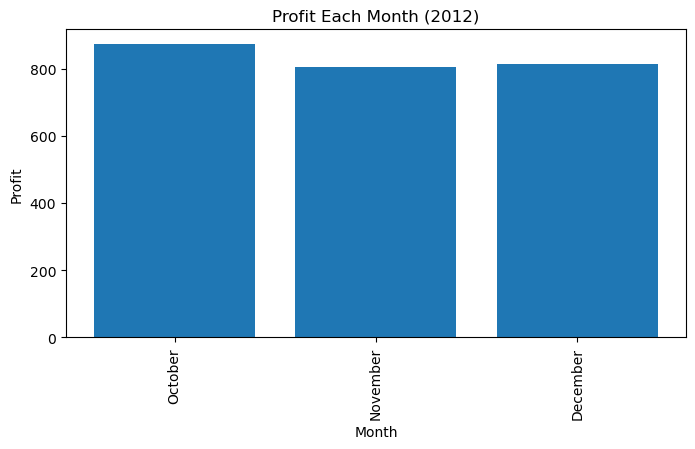

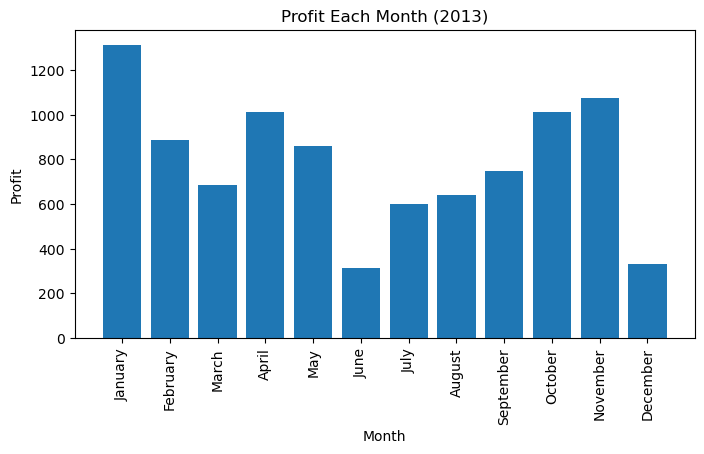

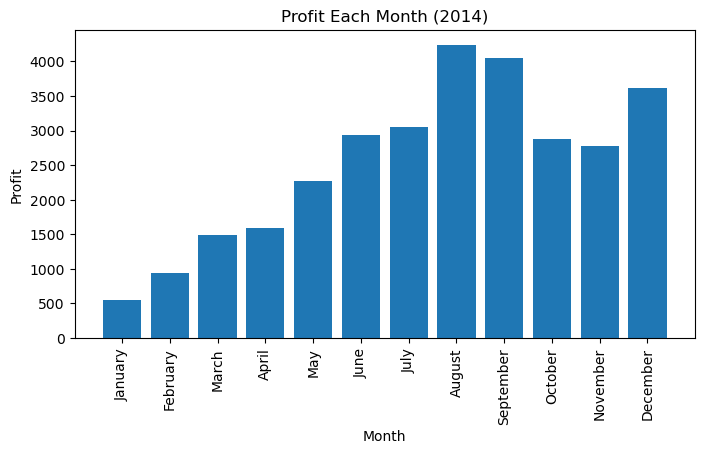

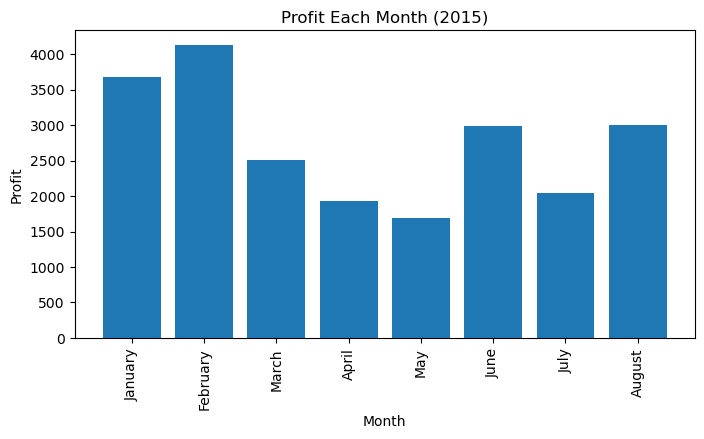

In [132]:
for year, df in mounthlyProfit.groupby('Year'):
    fig1, ax1 = plt.subplots(figsize=(8, 4))
    plt.bar(df['Month'], df['Profit'])
    plt.xlabel('Month')
    plt.ylabel('Profit')
    plt.title(f'Profit Each Month ({year})')
    plt.xticks(rotation='vertical')


In [12]:
quarterProfit = dataSet.copy()
quarterProfit = quarterProfit.groupby(pd.PeriodIndex(quarterProfit['Date'], freq='Q'))['Profit'].sum().reset_index()
quarterProfit

,Date,Profit
0,2012Q4,2493
1,2013Q1,2886
2,2013Q2,2190
3,2013Q3,1989
4,2013Q4,2419
5,2014Q1,2970
6,2014Q2,6785
7,2014Q3,11342
8,2014Q4,9283
9,2015Q1,10315


In [118]:
quarterProfit['Q'] = quarterProfit['Date'].dt.quarter
quarterProfit['Year'] = quarterProfit['Date'].dt.year
quarterProfit

,Date,Profit,Q,Year
0,2012Q4,2493,4,2012
1,2013Q1,2886,1,2013
2,2013Q2,2190,2,2013
3,2013Q3,1989,3,2013
4,2013Q4,2419,4,2013
5,2014Q1,2970,1,2014
6,2014Q2,6785,2,2014
7,2014Q3,11342,3,2014
8,2014Q4,9283,4,2014
9,2015Q1,10315,1,2015


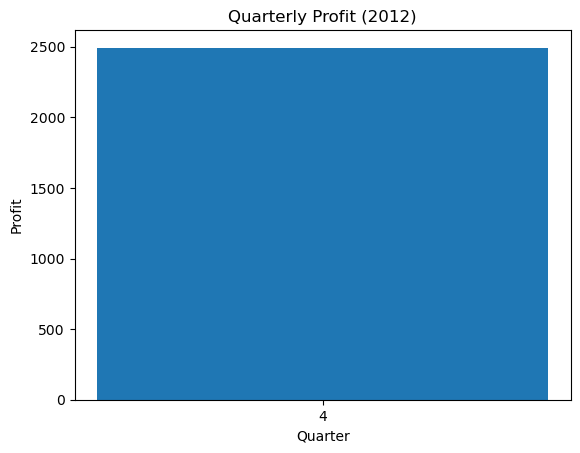

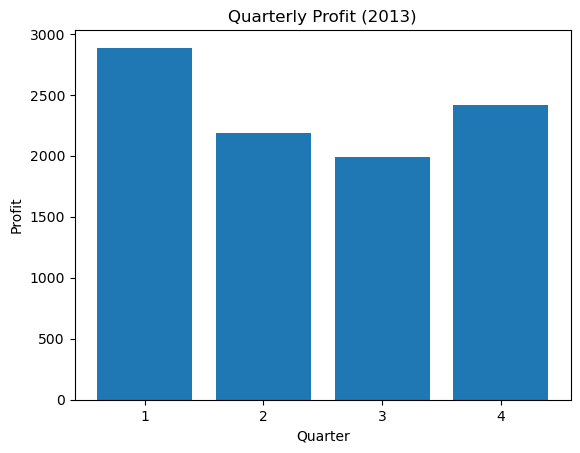

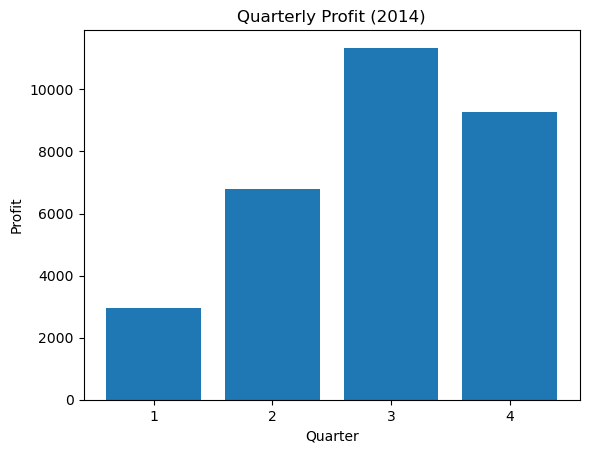

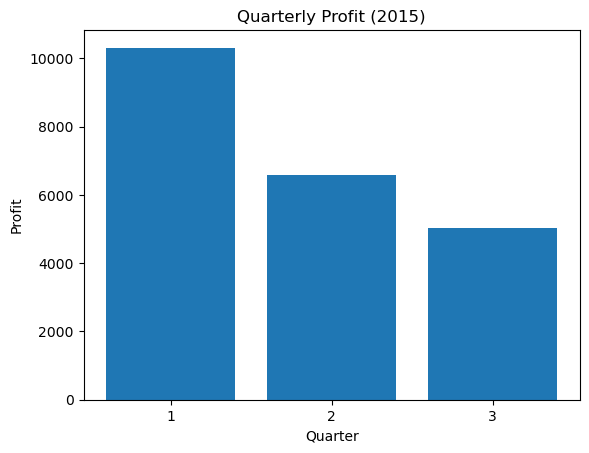

In [125]:
for year, df in quarterProfit.groupby('Year'):
    plt.bar(df['Q'], df['Profit'], tick_label= df['Q'])
    plt.ylabel('Profit')
    plt.xlabel('Quarter')
    plt.title(f'Quarterly Profit ({year})')
    sns.despine()
    plt.show()

## Onko kahvila ylittänyt vai alittanut tavoitevoittoa

In [47]:
targetProfit = dataSet.copy()
targetProfit = targetProfit.groupby(['Area Code']).agg({'Profit': 'sum', 'Target_profit': 'sum'})
targetProfit

<class 'pandas.core.frame.DataFrame'>


In [14]:
d = targetProfit.copy()

In [45]:
d['Profit Difference'] = d['Profit'] - d.groupby(['Area Code'])['Target_profit'].transform('first')
profitDifference = d.reset_index()
profitDifference

,Area Code,Profit,Target_profit,Profit Difference
0,203,944,930,14
1,206,779,870,-91
2,209,599,460,139
3,210,181,140,41
4,212,422,240,182
...,...,...,...,...
144,970,1740,1790,-50
145,971,1370,1430,-60
146,972,321,350,-29
147,978,410,420,-10


In [139]:
exceed = (targetProfit['Profit'] > targetProfit['Target_profit']).sum()
misses = (targetProfit['Profit'] < targetProfit['Target_profit']).sum()
equal = (targetProfit['Profit'] == targetProfit['Target_profit']).sum()
data = {'Exceed': [exceed], 'Misses': [misses], 'Matches': [equal]}
exceedOrMisses = pd.DataFrame(data)

In [140]:
exceedOrMisses

,Exceed,Misses,Matches
0,74,74,1


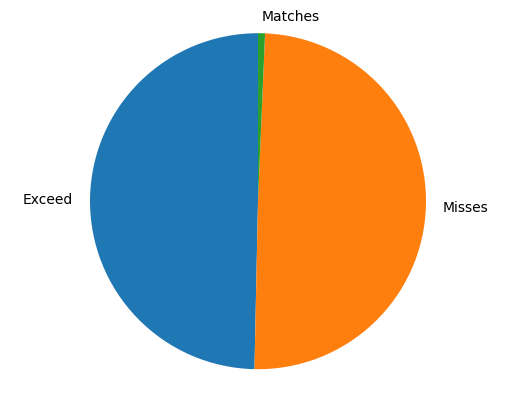

In [141]:
x = np.array(exceedOrMisses).flatten()
plt.pie(x, labels=['Exceed', 'Misses', 'Matches'], startangle=90)
plt.axis('equal')
plt.show()

# Tuoteiden analysointi

## Kofeinittomien ja kofeinillisten myynti

In [142]:
regularOrDecaf = dataSet.copy()
regularOrDecaf = regularOrDecaf.groupby(['Type'])['Sales'].sum().reset_index()
regularOrDecaf['%'] = regularOrDecaf.groupby(['Type'])['Sales'].transform('sum') / regularOrDecaf['Sales'].sum() * 100
regularOrDecaf

,Type,Sales,%
0,Decaf,85404,42.092708
1,Regular,117491,57.907292


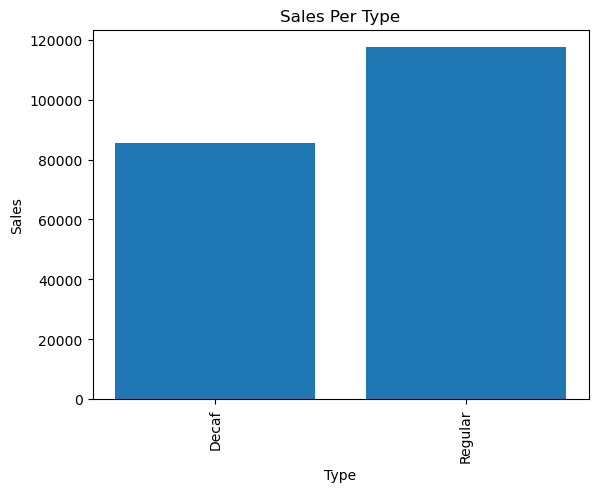

In [23]:
plt.bar(regularOrDecaf['Type'], regularOrDecaf['Sales'])
plt.xlabel('Type')
plt.ylabel('Sales')
plt.title('Sales Per Type')
plt.xticks(rotation='vertical')
plt.show()

In [24]:
mostPopularItem = dataSet.copy()
mostPopularItem = mostPopularItem.groupby(['Product'])['Sales'].sum().reset_index()
mostPopularItem

,Product,Sales
0,Amaretto,6781
1,Caffe Latte,8665
2,Caffe Mocha,21716
3,Chamomile,19295
4,Colombian,30761
5,Darjeeling,17758
6,Decaf Espresso,18888
7,Decaf Irish Cream,14831
8,Earl Grey,16546
9,Green Tea,8520


## Myynti tuotetta kohden

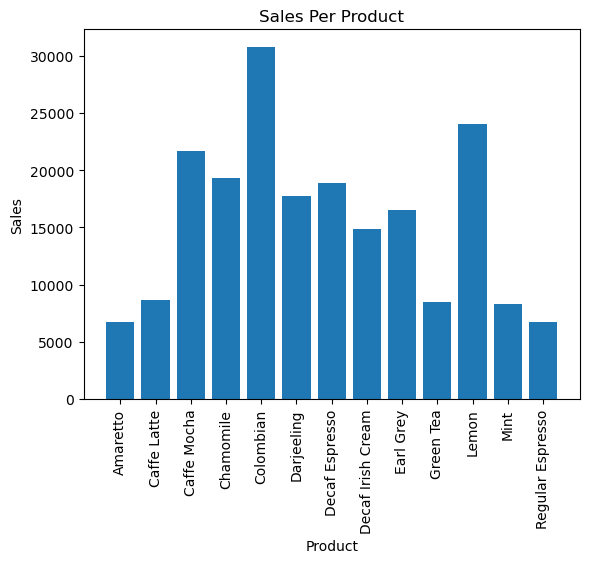

In [25]:
plt.bar(mostPopularItem['Product'], mostPopularItem['Sales'])
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Sales Per Product')
plt.xticks(rotation='vertical')
plt.show()

## Voiton myytyä tuotetta kohden

In [26]:
def bestProduct():
    uniqProducts = dataSet['Product'].unique()
    productData = {}

    for product in uniqProducts:
        prod = dataSet[dataSet['Product'] == product]
        sales = pd.DataFrame(prod['Sales']).to_numpy()
        profit = pd.DataFrame(prod['Profit']).to_numpy()
        profitPersale = np.divide(np.sum(profit, axis=0), np.sum(sales, axis=0))
        productData[product] = profitPersale
    
    return productData

In [27]:
best = bestProduct()
key = np.array(list(best.keys()))
value = np.array(list(best.values())).ravel()

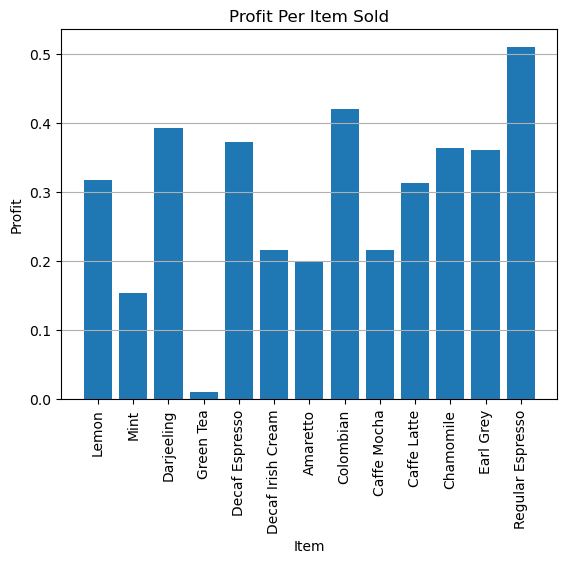

In [133]:
plt.bar(key, value)
plt.xlabel('Item')
plt.ylabel('Profit')
plt.title('Profit Per Item Sold')
plt.xticks(rotation='vertical')
plt.grid(axis='y')
plt.show()

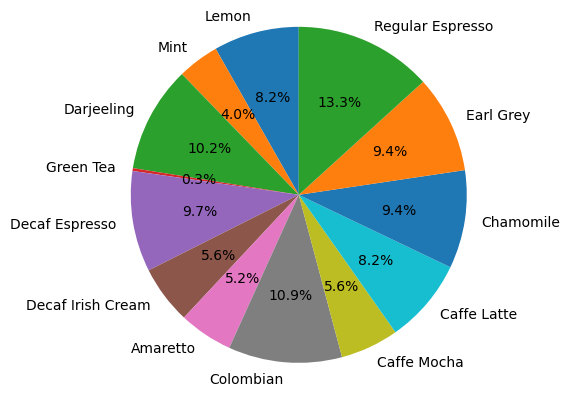

In [29]:
fig2, ax2 = plt.subplots()
ax2.pie(value, labels=key,  autopct='%.1f%%', startangle=90)
ax2.axis('equal')
plt.show()